In [1]:
import numpy as np
import os
import sys
import psutil
import nibabel as nib
from time import time
import json
import matplotlib.pyplot as plt
from contextlib import contextmanager
import warnings
warnings.filterwarnings("ignore")

from shutil import copyfile
import platform
if platform.system() != 'Windows':
    sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
    import ants

In [2]:
import brainsss
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
import scipy
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.cluster import hierarchy
import matplotlib as mpl
from matplotlib.pyplot import cm
import random
from scipy.stats import sem
import time
import h5py
import ants
import nibabel as nib

import matplotlib
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d as interp1d

In [3]:
fixed = brainsss.load_fda_meanbrain()

In [4]:
shape_testing = "/oak/stanford/groups/trc/data/yandan/2P_Imaging/moco_highpass_dff/aggregated_fly/stack20.npy"
data = np.load(shape_testing)

# Print the shape of the loaded data
print("Shape of loaded data:", data.shape)

Shape of loaded data: (4, 314, 146, 3384)


In [3]:
func_path_287 = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_287/analysis/functional_channel_2_moco_zscore_highpass_warped.h5'

In [44]:
with h5py.File(func_path_287, 'r') as h:
        print(h['nii_image'].shape)
        neural_one_z = h['nii_image'][:,:,40,:]

(314, 146, 91, 3384)


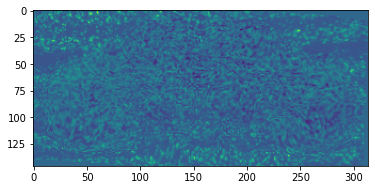

In [45]:
plt.imshow(neural_one_z[:,:,1000].T)

In [7]:
### MAKE THIS MASK ###

threshold = .2
mask = fixed>threshold

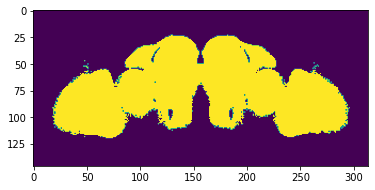

In [8]:
plt.imshow(mask[:,:,60].T)

In [8]:
mask.shape

(314, 146, 91)

In [15]:
neural_one_z.shape

NameError: name 'neural_one_z' is not defined

In [16]:
masked_data = neural_one_z*mask[:,:,40,np.newaxis]

NameError: name 'neural_one_z' is not defined

In [17]:
masked_data.shape

NameError: name 'masked_data' is not defined

In [18]:
plt.imshow(masked_data[:,:,100].T)

NameError: name 'masked_data' is not defined

In [9]:
from sklearn.feature_extraction import image

In [10]:
def create_clusters(super_to_cluster, n_clusters, n_flies):
    t0 = time.time()
    clustering_dir = "/oak/stanford/groups/trc/data/yandan/2P_Imaging/moco_highpass_dff/aggregated_fly"
    connectivity = image.grid_to_graph(314,146) ### this is based on image dimensions of a single slice
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters,
                                    memory=clustering_dir,
                                    linkage='ward',
                                    connectivity=connectivity)
    cluster_model.fit(super_to_cluster)
    print('Duration: {}'.format(time.time()-t0))
    return cluster_model

In [11]:
n_clusters = 2000
cluster_model = create_clusters(masked_data, n_clusters)
#labels.append(cluster_model.labels_)

NameError: name 'masked_data' is not defined

In [58]:
cluster_model.labels_.shape

(45844,)

In [59]:
labels = cluster_model.labels_.reshape(314,146)

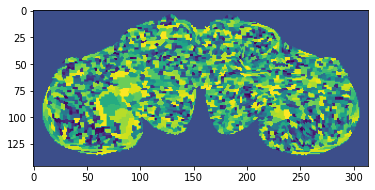

In [60]:
plt.imshow(labels.T)

In [12]:
labels = []
### loop over z-slices
for z in range(91):
    print(z)
    t0 = time.time()
    brain_file = "/oak/stanford/groups/trc/data/yandan/2P_Imaging/moco_highpass_dff/aggregated_fly/stack{}.npy".format(z)
    brain = np.array(np.load(brain_file), copy=True)
    
    ### MASK BRAIN ###
    mask_z = mask[:,:,z] #now shape (314,146)
    brain = brain * mask_z[np.newaxis,:,:,np.newaxis]
    
    ### reshape
    brain = np.moveaxis(brain,0,-1)
    brain_flat = brain.reshape((314*146,3384*4))

    n_clusters = 2000 # you have to tell the function how many supervoxels you want. I swept this number.
    cluster_model = create_clusters(brain_flat, n_clusters, n_flies=4)
    labels.append(cluster_model.labels_)
    
save_file = '/oak/stanford/groups/trc/data/yandan/2P_Imaging/moco_highpass_dff/aggregated_fly/darkbar_4_cluster_labels_2000'
np.save(save_file, np.asarray(labels))

0
Duration: 20.898114442825317
1
Duration: 19.78460192680359
2
Duration: 19.491419553756714
3
Duration: 19.891424417495728
4
Duration: 19.89231562614441
5
Duration: 19.609275102615356
6
Duration: 19.829582452774048
7
Duration: 20.44768762588501
8
Duration: 20.39450693130493
9
Duration: 19.967164516448975
10
Duration: 20.106534957885742
11
Duration: 20.624353647232056
12
Duration: 20.565832138061523
13
Duration: 20.426108837127686
14
Duration: 20.053028106689453
15
Duration: 20.540080547332764
16
Duration: 20.149420976638794
17
Duration: 20.63748288154602
18
Duration: 20.55430793762207
19
Duration: 20.175432682037354
20
Duration: 20.22137761116028
21
Duration: 20.64223599433899
22
Duration: 20.725554943084717
23
Duration: 20.16187334060669
24
Duration: 20.200966835021973
25
Duration: 20.688682556152344
26
Duration: 20.728291034698486
27
Duration: 20.65149474143982
28
Duration: 21.547520399093628
29
Duration: 20.689998388290405
30
Duration: 20.247645378112793
31
Duration: 20.734070777893

In [ ]:
supervoxel_activity = []
for z in range(91):
    for cluster in range(2000):
        indices = np.where(labels[z]==cluster)
        supervoxel_activity.append(np.mean(neural_data[z][indices]))

In [ ]:
[91,2000,4,3384]

In [83]:
314*146

45844

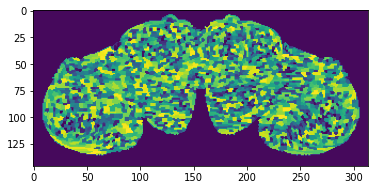

In [82]:
labels = cluster_model.labels_.reshape(314,146)
plt.imshow(labels.T)

In [ ]:
brain += mask[:,:,:,z,]

brain = brain + mask[:,:,:,z,]

In [77]:
brain.shape

(4, 314, 146, 3384)

In [78]:
brain = np.moveaxis(brain,0,-1)
brain.shape

(314, 146, 3384, 4)

In [79]:
brain_flat = brain.reshape((314*146,3384*4))

In [76]:
concatenated_brain = np.concatenate(brain, axis=3)

AxisError: axis 3 is out of bounds for array of dimension 3

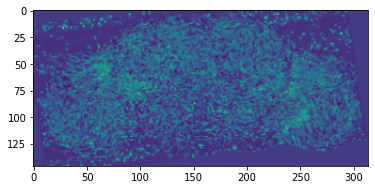

In [72]:
plt.imshow(brain[2,:,:,0].T)

In [70]:
mask.shape

(314, 146, 91)